# Validate new compendia

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import plotnine as pn
from sklearn.preprocessing import MinMaxScaler
import umap
import matplotlib.pyplot as plt
from core_acc_modules import paths, utils

In [2]:
# Expression data with SRA labels
pao1_expression_filename = paths.PAO1_COMPENDIUM_LABEL
pa14_expression_filename = paths.PA14_COMPENDIUM_LABEL

# Expression data pre-binning
pao1_expression_prebin_filename = paths.PAO1_PREBIN_COMPENDIUM
pa14_expression_prebin_filename = paths.PA14_PREBIN_COMPENDIUM

# SRA annotations
sra_annotation_filename = paths.SAMPLE_TO_STRAIN_PROCESSED

In [3]:
# Load data
pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", index_col=0, header=0)

pao1_expression_prebin = pd.read_csv(
    pao1_expression_prebin_filename, sep="\t", index_col=0, header=0
)
pa14_expression_prebin = pd.read_csv(
    pa14_expression_prebin_filename, sep="\t", index_col=0, header=0
)

sra_annotation = pd.read_csv(sra_annotation_filename, sep="\t", index_col=0, header=0)

## Get core and accessory annotations

In [4]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5361
Number of PAO1-specific genes: 203
Number of PA14-specific genes: 531


In [5]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

## Format data examining accessory genome

In [6]:
# Create accessory df for PAO1 compendium
# accessory gene ids | median accessory expression | strain label

# PAO1-only genes in PAO1 compendium
pao1_acc_pao1_compendium = pao1_expression[pao1_acc]
pao1_acc_pao1_compendium["median acc expression"] = pao1_acc_pao1_compendium.median(
    axis=1
)

# PA14-only genes in PAO1 compendium
pao1_binned_sample_ids = list(pao1_expression.index)
pa14_acc_pao1_compendium = pa14_expression_prebin.loc[pao1_binned_sample_ids, pa14_acc]
pa14_acc_pao1_compendium["median acc expression"] = pa14_acc_pao1_compendium.median(
    axis=1
)

pao1_acc_pao1_compendium.head()

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


,PA1938,PA3152,PA2224,PA5264,PA1834,PA1381,PA2335,PA0205,PA0819,PA0645,...,PA0100,PA2771,PA3159,PA2219,PA1151,PA0053,PA4107,PA0977,PA0715,median acc expression
ERX2259197,20.218771,412.962126,22.180574,103.874366,53.117318,7.948873,2.416896,45.812240,20.660827,400.361481,...,209.184480,25.238597,674.856875,6.957740,4182.546917,96.676763,7.166026,61.069006,1064.634481,29.114911
SRX3449591,32.797513,63.247047,10.659110,23.782698,11.877815,2.864571,0.536612,1.793235,6.603770,63.331027,...,6.271086,30.115585,651.553316,3.923388,89.551209,81.399734,0.432477,30.733009,804.059909,7.506504
SRX7058512,13.614455,31.315983,42.634561,32.021084,40.526056,0.703434,0.192467,0.761463,6.431123,179.848151,...,27.517400,4.098455,625.702191,11.173116,95.712300,52.435801,0.510811,1.602198,683.713042,13.009645
SRX1737670,30.110768,73.173288,23.041081,36.243200,33.905340,4.258021,1.597783,10.278487,6.793323,91.000278,...,73.836553,62.289776,403.817515,5.507571,1296.081744,87.896590,4.104161,5.148762,137.787493,22.956278
SRX1156138,35.488923,108.834303,29.892663,43.412203,42.614041,8.774706,2.859876,16.573241,10.630144,103.828949,...,90.647925,109.212977,777.418883,9.298165,1034.500166,135.523090,3.039669,10.222782,261.350642,32.492463


In [7]:
pa14_acc_pao1_compendium.head()

,PA14_59140,PA14_59950,PA14_28460,PA14_31260,PA14_32850,PA14_60040,PA14_28540,PA14_54920,PA14_36400,PA14_54930,...,PA14_58980,PA14_55240,PA14_59210,PA14_03390,PA14_01130,PA14_22230,PA14_30890,PA14_39700,PA14_13880,median acc expression
ERX2259197,0.0,0.0,106.270483,0.0,0.0,0.0,22.256250,0.0,4.401666,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,42.351059,8.509996,0.0
SRX3449591,0.0,0.0,9.819126,0.0,0.0,0.0,1.670951,0.0,0.109022,0.0,...,0.0,8.746999,0.0,0.0,0.0,0.0,0.0,5.892127,1.433547,0.0
SRX7058512,0.0,0.0,94.962407,0.0,0.0,0.0,0.000000,0.0,0.684640,0.0,...,0.0,4.792945,0.0,0.0,0.0,0.0,0.0,78.421442,0.000000,0.0
SRX1737670,0.0,0.0,284.559489,0.0,0.0,0.0,9.747546,0.0,19.011955,0.0,...,0.0,6.909446,0.0,0.0,0.0,0.0,0.0,14.567953,9.959774,0.0
SRX1156138,0.0,0.0,246.805072,0.0,0.0,0.0,36.264073,0.0,27.170279,0.0,...,0.0,14.683420,0.0,0.0,0.0,0.0,0.0,96.118018,14.360550,0.0


In [8]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pao1_compendium_label = pao1_acc_pao1_compendium.merge(
    pa14_acc_pao1_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_acc_pao1_compendium_label.head()

,PA1938,PA3152,PA2224,PA5264,PA1834,PA1381,PA2335,PA0205,PA0819,PA0645,...,PA14_58980,PA14_55240,PA14_59210,PA14_03390,PA14_01130,PA14_22230,PA14_30890,PA14_39700,PA14_13880,median acc expression_pa14
ERX2259197,20.218771,412.962126,22.180574,103.874366,53.117318,7.948873,2.416896,45.812240,20.660827,400.361481,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,42.351059,8.509996,0.0
SRX3449591,32.797513,63.247047,10.659110,23.782698,11.877815,2.864571,0.536612,1.793235,6.603770,63.331027,...,0.0,8.746999,0.0,0.0,0.0,0.0,0.0,5.892127,1.433547,0.0
SRX7058512,13.614455,31.315983,42.634561,32.021084,40.526056,0.703434,0.192467,0.761463,6.431123,179.848151,...,0.0,4.792945,0.0,0.0,0.0,0.0,0.0,78.421442,0.000000,0.0
SRX1737670,30.110768,73.173288,23.041081,36.243200,33.905340,4.258021,1.597783,10.278487,6.793323,91.000278,...,0.0,6.909446,0.0,0.0,0.0,0.0,0.0,14.567953,9.959774,0.0
SRX1156138,35.488923,108.834303,29.892663,43.412203,42.614041,8.774706,2.859876,16.573241,10.630144,103.828949,...,0.0,14.683420,0.0,0.0,0.0,0.0,0.0,96.118018,14.360550,0.0


In [9]:
# Create accessory df for PA14 compendium
# accessory gene ids | median accessory expression | strain label

# PA14-only genes in PA14 compendium
pa14_acc_pa14_compendium = pa14_expression[pa14_acc]
pa14_acc_pa14_compendium["median acc expression"] = pa14_acc_pa14_compendium.median(
    axis=1
)

# PAO1-only genes in PA14 compendium
pa14_binned_sample_ids = list(pa14_expression.index)
pao1_acc_pa14_compendium = pao1_expression_prebin.loc[pa14_binned_sample_ids, pao1_acc]
pao1_acc_pa14_compendium["median acc expression"] = pao1_acc_pa14_compendium.median(
    axis=1
)

pa14_acc_pa14_compendium.head()

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PA14_59140,PA14_59950,PA14_28460,PA14_31260,PA14_32850,PA14_60040,PA14_28540,PA14_54920,PA14_36400,PA14_54930,...,PA14_58980,PA14_55240,PA14_59210,PA14_03390,PA14_01130,PA14_22230,PA14_30890,PA14_39700,PA14_13880,median acc expression
SRX5572898,23.769772,11.708106,254.131513,0.000000,7.278400,21.154019,0.000000,16.291125,0.000000,8.120474,...,5.071198,14.708491,2.682848,1.020269,28.393985,8.775292,0.000000,20.916539,0.000000,11.978493
SRX6437618,214.550670,224.223111,244.384218,0.000000,0.000000,403.631087,85.836255,0.000000,3.870328,0.049089,...,277.534700,0.000000,128.165003,0.000000,565.515214,0.000000,0.000000,223.050715,1335.395354,89.456896
SRX470367,25.914700,34.247549,159.938424,0.000000,15.685770,58.729686,10.717612,19.098486,3.041209,13.260176,...,19.959450,5.171009,4.639899,13.532302,395.044033,9.071639,0.000000,27.532111,84.211938,21.008492
SRX2962082,0.000000,0.000000,30.879798,0.000000,0.000000,0.000000,19.366521,0.000000,1.479148,0.000000,...,0.000000,32.148532,0.000000,0.000000,0.000000,0.000000,0.000000,6.208886,0.000000,0.000000
SRX8030416,32.481703,19.696154,551.345761,1.621634,33.998565,134.584909,13.846740,23.548128,19.450353,9.270065,...,7.836702,57.712503,10.538292,5.427051,24.638081,15.716765,28.243698,55.707380,17.227896,28.256226


In [10]:
pao1_acc_pa14_compendium.head()

,PA1938,PA3152,PA2224,PA5264,PA1834,PA1381,PA2335,PA0205,PA0819,PA0645,...,PA0100,PA2771,PA3159,PA2219,PA1151,PA0053,PA4107,PA0977,PA0715,median acc expression
SRX5572898,20.354018,0.000000,0.000000,0.000000,18.312108,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
SRX6437618,435.580109,0.000000,1333.732246,0.000000,55.607880,689.270025,0.074272,0.000000,228.261309,0.000000,...,0.000000,0.000000,0.121135,115.694480,566.229098,0.000000,0.00000,627.602458,0.381519,0.519493
SRX470367,55.939693,0.000000,0.000000,0.000000,15.753468,0.000000,0.000000,0.000000,10.799268,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.330336,0.000000,0.000000
SRX2962082,25.260419,29.271198,3.572314,30.658034,41.616811,10.938858,3.144277,26.655879,11.179821,450.247391,...,114.445223,94.731344,674.149092,9.248608,323.744823,116.201192,4.77298,46.926020,53.399325,22.347645
SRX8030416,41.605515,0.000000,0.000000,0.000000,60.028378,0.000000,0.000000,0.000000,10.912984,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.958781,0.000000,0.000000


In [11]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pa14_compendium_label = pa14_acc_pa14_compendium.merge(
    pao1_acc_pa14_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pa14", "_pao1"],
)

pao1_pa14_acc_pa14_compendium_label.head()

,PA14_59140,PA14_59950,PA14_28460,PA14_31260,PA14_32850,PA14_60040,PA14_28540,PA14_54920,PA14_36400,PA14_54930,...,PA0100,PA2771,PA3159,PA2219,PA1151,PA0053,PA4107,PA0977,PA0715,median acc expression_pao1
SRX5572898,23.769772,11.708106,254.131513,0.000000,7.278400,21.154019,0.000000,16.291125,0.000000,8.120474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
SRX6437618,214.550670,224.223111,244.384218,0.000000,0.000000,403.631087,85.836255,0.000000,3.870328,0.049089,...,0.000000,0.000000,0.121135,115.694480,566.229098,0.000000,0.00000,627.602458,0.381519,0.519493
SRX470367,25.914700,34.247549,159.938424,0.000000,15.685770,58.729686,10.717612,19.098486,3.041209,13.260176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.330336,0.000000,0.000000
SRX2962082,0.000000,0.000000,30.879798,0.000000,0.000000,0.000000,19.366521,0.000000,1.479148,0.000000,...,114.445223,94.731344,674.149092,9.248608,323.744823,116.201192,4.77298,46.926020,53.399325,22.347645
SRX8030416,32.481703,19.696154,551.345761,1.621634,33.998565,134.584909,13.846740,23.548128,19.450353,9.270065,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.958781,0.000000,0.000000


## Accessory plots

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


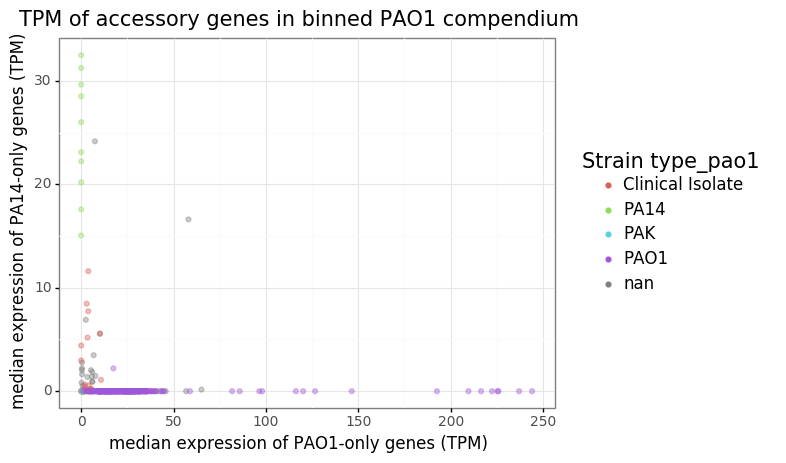

<ggplot: (8771457156617)>


In [12]:
# Plot accessory gene expression in PAO1 compendium
fig1 = pn.ggplot(
    pao1_pa14_acc_pao1_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig1 += pn.geom_point(pn.aes(color="Strain type_pao1"), alpha=0.4)
fig1 += pn.labs(
    x="median expression of PAO1-only genes (TPM)",
    y="median expression of PA14-only genes (TPM)",
    title="TPM of accessory genes in binned PAO1 compendium",
)
fig1 += pn.theme_bw()
fig1 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig1 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig1)

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


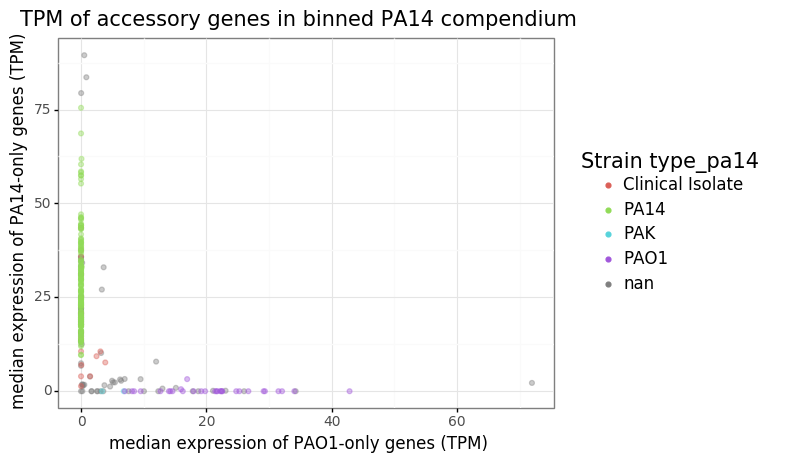

<ggplot: (8771457178933)>


In [13]:
# Plot accessory gene expression in PA14 compendium
fig2 = pn.ggplot(
    pao1_pa14_acc_pa14_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig2 += pn.geom_point(pn.aes(color="Strain type_pa14"), alpha=0.4)
fig2 += pn.labs(
    x="median expression of PAO1-only genes (TPM)",
    y="median expression of PA14-only genes (TPM)",
    title="TPM of accessory genes in binned PA14 compendium",
)
fig2 += pn.theme_bw()
fig2 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig2 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig2)

These plots are showing the median expression of PAO1 genes (PAO1 accessory genes) on the x-axis and the median expression of PA14-only genes (PA14 accessory genes) on the y-axis.
Each point is a sample.

If we binned our samples accurately then for samples within our binned PAO1 compendium, we expect that samples will align along the PAO1-only axis. Similarly, for samples within our binned PA14 compendium, we expect that samples will align along the PA14-axis.

## Core plots

### using PAO1 reference

In [14]:
# Get core gene expression in PAO1 compendium
pao1_core_pao1_compendium = pao1_expression[pao1_core]

# Get core genes expression in PA14 compendium
pa14_core_pa14_compendium = pa14_expression[pa14_core]

In [15]:
# Get mapping between PAO1 and PA14 genes using PAO1 and PA14 references
gene_mapping_pa14 = utils.get_pao1_pa14_gene_map(pa14_annot_filename, "pa14")
pa14_core_to_pao1_core = gene_mapping_pa14.loc[pa14_core, "PAO1_ID"]

# Convert PA14 core ids to PAO1 core ids so we can merge
pao1_core_pa14_compendium = pa14_core_pa14_compendium.rename(
    columns=pa14_core_to_pao1_core
)

In [16]:
# Get mapping between PAO1 and PA14 genes using PAO1 and PA14 references
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(pao1_annot_filename, "pao1")
pao1_core_to_pa14_core = gene_mapping_pao1.loc[pao1_core, "PA14_ID"]

# Convert PAO1 core ids to PA14 core ids so we can merge
pa14_core_pao1_compendium = pao1_core_pao1_compendium.rename(
    columns=pao1_core_to_pa14_core
)

In [17]:
# Check for 1 to many mappings that will result in duplicate gene ids
if pao1_core_pa14_compendium.columns.duplicated().any():
    deduplicated_columns = list(
        pao1_core_pa14_compendium.columns[
            ~pao1_core_pa14_compendium.columns.duplicated(keep=False)
        ]
    )
    pao1_core_pa14_compendium = pao1_core_pa14_compendium[deduplicated_columns]

if pao1_core_pao1_compendium.columns.duplicated().any():
    deduplicated_columns = list(
        pao1_core_pao1_compendium.columns[
            ~pao1_core_pao1_compendium.columns.duplicated(keep=False)
        ]
    )
    pao1_core_pao1_compendium = pao1_core_pao1_compendium[deduplicated_columns]

if pa14_core_pao1_compendium.columns.duplicated().any():
    deduplicated_columns = list(
        pa14_core_pao1_compendium.columns[
            ~pa14_core_pao1_compendium.columns.duplicated(keep=False)
        ]
    )
    pa14_core_pao1_compendium = pa14_core_pao1_compendium[deduplicated_columns]

In [18]:
# Get shared core genes
shared_pao1_core_genes = list(
    set(pao1_core_pao1_compendium.columns).intersection(
        pao1_core_pa14_compendium.columns
    )
)

shared_pa14_core_genes = list(
    set(pa14_core_pao1_compendium.columns).intersection(
        pa14_core_pa14_compendium.columns
    )
)

print(len(shared_pao1_core_genes))
print(len(shared_pa14_core_genes))

# re-order columns to match
pao1_core_pao1_compendium = pao1_core_pao1_compendium[shared_pao1_core_genes]
pao1_core_pa14_compendium = pao1_core_pa14_compendium[shared_pao1_core_genes]
pa14_core_pa14_compendium = pa14_core_pa14_compendium[shared_pa14_core_genes]
pa14_core_pao1_compendium = pa14_core_pao1_compendium[shared_pa14_core_genes]

5347
5349


In [19]:
print(pao1_core_pao1_compendium.shape)
print(pao1_core_pa14_compendium.shape)

print(pa14_core_pa14_compendium.shape)
print(pa14_core_pao1_compendium.shape)

(451, 5347)
(287, 5347)
(287, 5349)
(451, 5349)


In [20]:
# Add labels
pao1_core_pao1_compendium["our label"] = "PAO1"
pao1_core_pa14_compendium["our label"] = "PA14"
pa14_core_pa14_compendium["our label"] = "PA14"
pa14_core_pao1_compendium["our label"] = "PAO1"

pao1_core_pao1_compendium["sra label"] = sra_annotation.loc[
    list(pao1_core_pao1_compendium.index), "Strain type"
]
pao1_core_pa14_compendium["sra label"] = sra_annotation.loc[
    list(pao1_core_pa14_compendium.index), "Strain type"
]

pa14_core_pa14_compendium["sra label"] = sra_annotation.loc[
    list(pa14_core_pa14_compendium.index), "Strain type"
]
pa14_core_pao1_compendium["sra label"] = sra_annotation.loc[
    list(pa14_core_pao1_compendium.index), "Strain type"
]

In [21]:
# Merge on columns
pao1_core_label = pd.concat([pao1_core_pao1_compendium, pao1_core_pa14_compendium])
print(pao1_core_label.shape)
pao1_core_label.head()

(738, 5349)


,PA4835,PA3705,PA0010,PA2719,PA0218,PA2889,PA1880,PA2179,PA4373,PA3972,...,PA4134,PA1107,PA5166,PA5356,PA1717,PA1288,PA0488,PA2635,our label,sra label
ERX2259197,15.589379,86.363768,12.964330,19.316186,20.521868,22.601553,14.516086,3.733751,44.699868,41.016360,...,449.651834,10.240358,44.202841,52.704995,4.109838,676.182380,45.071405,9.531202,PAO1,PAO1
SRX3449591,1.503643,64.439980,11.545263,8.220902,4.418959,2.949715,2.202375,0.033717,63.644865,7.560630,...,7.488803,4.909242,35.676624,2.052050,3.028018,241.861415,11.028684,0.996204,PAO1,NaN
SRX7058512,2.186354,49.746864,10.136442,36.823830,17.207913,8.671948,126.993334,7.686169,44.243796,126.040344,...,183.167369,28.447135,36.194802,24.238824,0.727145,141.378518,20.735089,4.061613,PAO1,PAO1
SRX1737670,24.886163,21.575020,15.577429,16.812399,11.624331,41.394856,46.717723,6.829861,30.862344,59.964159,...,75.225096,23.135377,25.314876,52.225950,4.085891,196.607357,23.684336,8.210016,PAO1,PAO1
SRX1156138,417.778500,72.210495,28.126273,21.501484,22.882347,21.013228,39.129628,15.644650,60.947368,47.704651,...,19.513760,35.214633,33.623054,49.723950,8.274773,142.649433,32.572784,9.380884,PAO1,PAO1


In [22]:
# Merge
pa14_core_label = pd.concat([pa14_core_pa14_compendium, pa14_core_pao1_compendium])
print(pa14_core_label.shape)
pa14_core_label.head()

(738, 5351)


,PA14_38630,PA14_10340,PA14_08000,PA14_24490,PA14_04780,PA14_61330,PA14_34200,PA14_32770,PA14_57580,PA14_51000,...,PA14_02340,PA14_29760,PA14_71640,PA14_72850,PA14_64770,PA14_03590,PA14_53000,PA14_47890,our label,sra label
SRX5572898,473.300980,17.654263,280.802543,2.287823,30.783325,9.620234,1.272412,22.624744,702.447977,61.001723,...,5.573050,27.685318,55.765423,12.733726,1.974273,36.875687,2896.895863,5.447172,PA14,PA14
SRX6437618,40.816865,89.666552,87.368900,47.753272,113.811284,29.059524,63.830571,80.442239,204.531507,86.676177,...,56.390552,135.655439,74.543238,66.287595,52.511967,125.380256,226.814660,91.462652,PA14,NaN
SRX470367,582.619457,29.893270,130.793101,1.242504,39.198787,2.135026,1.275084,121.700398,1698.390620,80.970328,...,0.000000,29.798619,14.153678,24.262601,3.689889,31.018570,1224.979554,31.055376,PA14,PA14
SRX2962082,346.294070,4.189536,1232.904154,13.734373,10.111389,28.808393,2.937563,67.746897,6229.434150,120.810248,...,6.058187,50.351233,48.323563,53.849734,5.276454,10.728289,564.979319,61.421558,PA14,PAO1
SRX8030416,648.302127,35.057875,320.076655,3.041796,23.716321,45.251432,3.189641,30.310329,509.081487,75.542973,...,10.179863,19.930023,238.571178,65.401573,6.291333,34.390047,1245.655663,81.550816,PA14,PA14


In [23]:
# Drop label columns
pao1_core_numeric = pao1_core_label.drop(["our label", "sra label"], axis=1)
pa14_core_numeric = pa14_core_label.drop(["our label", "sra label"], axis=1)

In [24]:
pao1_core_numeric.head()

,PA4835,PA3705,PA0010,PA2719,PA0218,PA2889,PA1880,PA2179,PA4373,PA3972,...,PA0531,PA3140,PA4134,PA1107,PA5166,PA5356,PA1717,PA1288,PA0488,PA2635
ERX2259197,15.589379,86.363768,12.964330,19.316186,20.521868,22.601553,14.516086,3.733751,44.699868,41.016360,...,24.438184,90.960496,449.651834,10.240358,44.202841,52.704995,4.109838,676.182380,45.071405,9.531202
SRX3449591,1.503643,64.439980,11.545263,8.220902,4.418959,2.949715,2.202375,0.033717,63.644865,7.560630,...,1.427320,29.309455,7.488803,4.909242,35.676624,2.052050,3.028018,241.861415,11.028684,0.996204
SRX7058512,2.186354,49.746864,10.136442,36.823830,17.207913,8.671948,126.993334,7.686169,44.243796,126.040344,...,3.299797,9.389079,183.167369,28.447135,36.194802,24.238824,0.727145,141.378518,20.735089,4.061613
SRX1737670,24.886163,21.575020,15.577429,16.812399,11.624331,41.394856,46.717723,6.829861,30.862344,59.964159,...,22.530843,64.400701,75.225096,23.135377,25.314876,52.225950,4.085891,196.607357,23.684336,8.210016
SRX1156138,417.778500,72.210495,28.126273,21.501484,22.882347,21.013228,39.129628,15.644650,60.947368,47.704651,...,65.156524,44.287062,19.513760,35.214633,33.623054,49.723950,8.274773,142.649433,32.572784,9.380884


In [25]:
# 0-1 normalize per gene
scaler = MinMaxScaler()

# Fitting
normalized_pao1_core_numeric = scaler.fit_transform(pao1_core_numeric)
normalized_pao1_core_numeric_df = pd.DataFrame(
    normalized_pao1_core_numeric,
    columns=pao1_core_numeric.columns,
    index=pao1_core_numeric.index,
)

normalized_pa14_core_numeric = scaler.fit_transform(pa14_core_numeric)
normalized_pa14_core_numeric_df = pd.DataFrame(
    normalized_pa14_core_numeric,
    columns=pa14_core_numeric.columns,
    index=pa14_core_numeric.index,
)

In [26]:
# model_pao1 = pca.fit(normalized_pao1_expression_numeric_df)
model_pao1 = umap.UMAP(random_state=123).fit(normalized_pao1_core_numeric_df)

normalized_pao1_core_encoded = model_pao1.transform(normalized_pao1_core_numeric_df)

normalized_pao1_core_encoded_df = pd.DataFrame(
    data=normalized_pao1_core_encoded,
    index=normalized_pao1_core_numeric_df.index,
    columns=["1", "2"],
)

# Add back label
normalized_pao1_core_encoded_df[["our label", "sra label"]] = pao1_core_label[
    ["our label", "sra label"]
]

In [27]:
# model_pao1 = pca.fit(normalized_pao1_expression_numeric_df)
model_pa14 = umap.UMAP(random_state=123).fit(normalized_pa14_core_numeric_df)

normalized_pa14_core_encoded = model_pa14.transform(normalized_pa14_core_numeric_df)

normalized_pa14_core_encoded_df = pd.DataFrame(
    data=normalized_pa14_core_encoded,
    index=normalized_pa14_core_numeric_df.index,
    columns=["1", "2"],
)

# Add back label
normalized_pa14_core_encoded_df[["our label", "sra label"]] = pa14_core_label[
    ["our label", "sra label"]
]

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


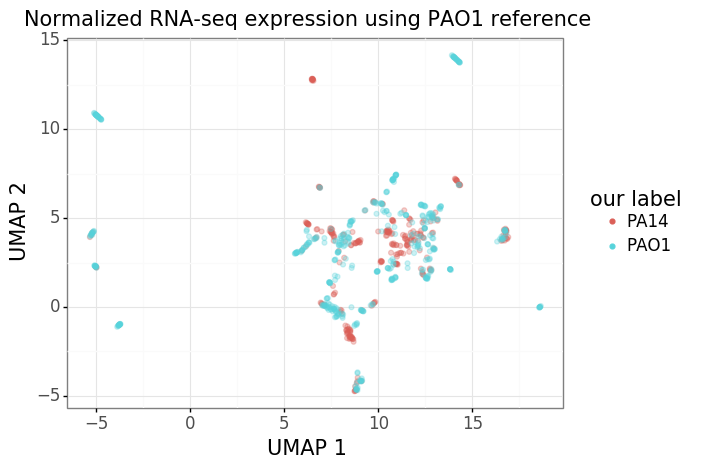

<ggplot: (8771454453605)>


In [28]:
# Plot core gene expression in PAO1 reference
fig3 = pn.ggplot(normalized_pao1_core_encoded_df, pn.aes(x="1", y="2"))
fig3 += pn.geom_point(pn.aes(color="our label"), alpha=0.3)
fig3 += pn.labs(
    x="UMAP 1", y="UMAP 2", title="Normalized RNA-seq expression using PAO1 reference"
)
fig3 += pn.theme_bw()
fig3 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig3 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig3)

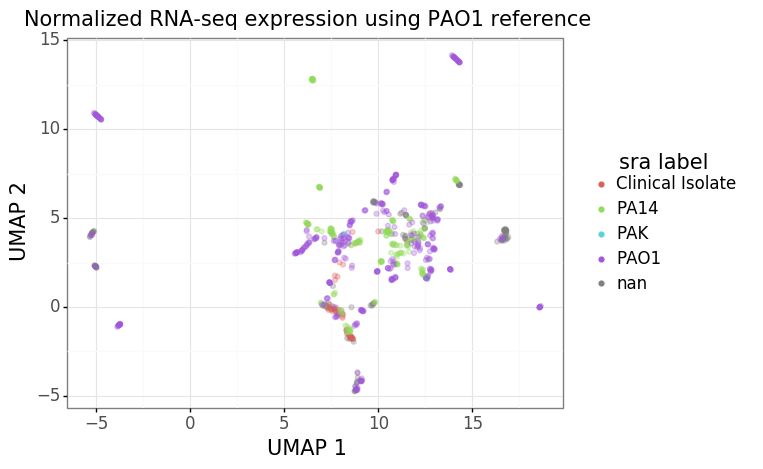

<ggplot: (8771453631433)>


In [29]:
# Plot core gene expression in PAO1 reference
fig4 = pn.ggplot(normalized_pao1_core_encoded_df, pn.aes(x="1", y="2"))
fig4 += pn.geom_point(pn.aes(color="sra label"), alpha=0.3)
fig4 += pn.labs(
    x="UMAP 1", y="UMAP 2", title="Normalized RNA-seq expression using PAO1 reference"
)
fig4 += pn.theme_bw()
fig4 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig4 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig4)

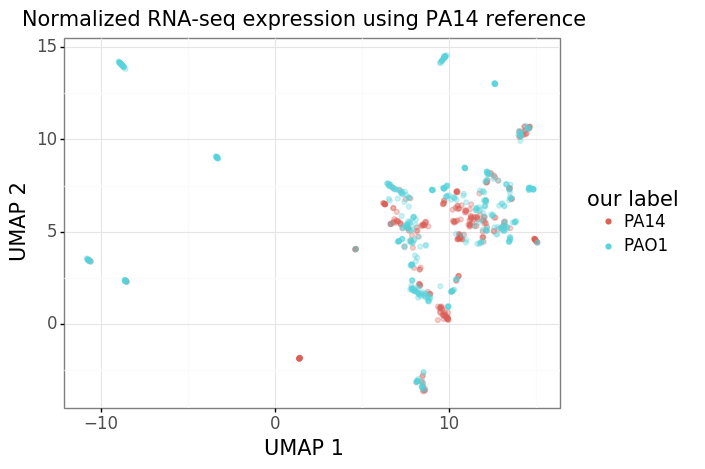

<ggplot: (8771455716593)>


In [30]:
# Plot core gene expression in PA14 reference
fig5 = pn.ggplot(normalized_pa14_core_encoded_df, pn.aes(x="1", y="2"))
fig5 += pn.geom_point(pn.aes(color="our label"), alpha=0.3)
fig5 += pn.labs(
    x="UMAP 1", y="UMAP 2", title="Normalized RNA-seq expression using PA14 reference"
)
fig5 += pn.theme_bw()
fig5 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig5 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig5)

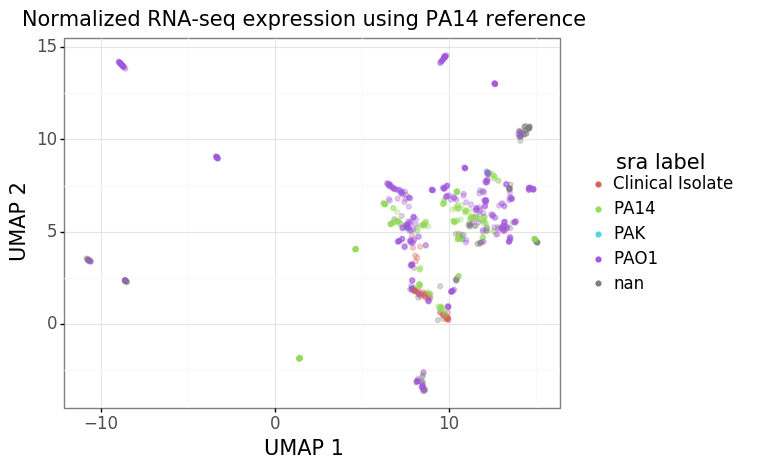

<ggplot: (8771455559389)>


In [31]:
# Plot core gene expression in PA14 reference
fig6 = pn.ggplot(normalized_pa14_core_encoded_df, pn.aes(x="1", y="2"))
fig6 += pn.geom_point(pn.aes(color="sra label"), alpha=0.3)
fig6 += pn.labs(
    x="UMAP 1", y="UMAP 2", title="Normalized RNA-seq expression using PA14 reference"
)
fig6 += pn.theme_bw()
fig6 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig6 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig6)

Samples appear to cluster together. Would have expected more separation between PAO1 and PA14 using core gene expression.